<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BigData---Final-Project" data-toc-modified-id="BigData---Final-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BigData - Final Project</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Exploring-The-Data" data-toc-modified-id="Exploring-The-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring The Data</a></span><ul class="toc-item"><li><span><a href="#first-and-last-40-rows" data-toc-modified-id="first-and-last-40-rows-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>first and last 40 rows</a></span></li><li><span><a href="#Number-of-observations" data-toc-modified-id="Number-of-observations-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Number of observations</a></span></li><li><span><a href="#deduce-period" data-toc-modified-id="deduce-period-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>deduce period</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Statistics</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Average-opening/closing-prices-by-period" data-toc-modified-id="Average-opening/closing-prices-by-period-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Average opening/closing prices by period</a></span></li><li><span><a href="#Stock-price-changes-by-period" data-toc-modified-id="Stock-price-changes-by-period-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Stock price changes by period</a></span></li><li><span><a href="#Daily-return" data-toc-modified-id="Daily-return-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Daily return</a></span></li><li><span><a href="#Highest-daily-return" data-toc-modified-id="Highest-daily-return-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Highest daily return</a></span></li><li><span><a href="#Average-daily-return" data-toc-modified-id="Average-daily-return-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Average daily return</a></span></li></ul></li><li><span><a href="#Moving-average" data-toc-modified-id="Moving-average-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Moving average</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Return-rate" data-toc-modified-id="Return-rate-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Return rate</a></span></li><li><span><a href="#Best-return-rate" data-toc-modified-id="Best-return-rate-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Best return rate</a></span></li><li><span><a href="#Insights" data-toc-modified-id="Insights-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Insights</a></span><ul class="toc-item"><li><span><a href="#William’s-R%" data-toc-modified-id="William’s-R%-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>William’s R%</a></span></li><li><span><a href="#Momentum-and-ROC" data-toc-modified-id="Momentum-and-ROC-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Momentum and ROC</a></span><ul class="toc-item"><li><span><a href="#Momentum" data-toc-modified-id="Momentum-1.8.2.1"><span class="toc-item-num">1.8.2.1&nbsp;&nbsp;</span>Momentum</a></span></li><li><span><a href="#Roc" data-toc-modified-id="Roc-1.8.2.2"><span class="toc-item-num">1.8.2.2&nbsp;&nbsp;</span>Roc</a></span></li></ul></li><li><span><a href="#Commodity-Chanel-Index" data-toc-modified-id="Commodity-Chanel-Index-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Commodity Chanel Index</a></span></li><li><span><a href="#Gravity-center" data-toc-modified-id="Gravity-center-1.8.4"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>Gravity center</a></span></li><li><span><a href="#Bollinger-bands" data-toc-modified-id="Bollinger-bands-1.8.5"><span class="toc-item-num">1.8.5&nbsp;&nbsp;</span>Bollinger bands</a></span></li></ul></li></ul></li></ul></div>

__AUTHORS__:
  - Théo Perinet (22172 - theo.perinet)
  - Mathieu Rivier (23553 - mathieu.rivier)
  - Marc Monteil (23742 - marc.monteil)

# BigData - Final Project

In [1]:
# cell for autoreload includes
%load_ext autoreload
%autoreload 2

We load the python file containing the class Stocks.
This file use the file containing the class Stock.
This classes contain all our work.

In [2]:
from src.stocks import Stocks
# The warnings are due to the includes in the file

22/06/20 13:39:30 WARN Utils: Your hostname, toto-Virtual-Machine resolves to a loopback address: 127.0.1.1; using 172.17.249.236 instead (on interface eth0)
22/06/20 13:39:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/20 13:39:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/06/20 13:39:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## Load data

We define the schema of the datas contained in files

In [3]:
from pyspark.sql.types import DoubleType, StringType, DateType, StructType, StructField

In [4]:
data_schema = StructType([
    StructField('Date', DateType(), True),
    StructField('High', DoubleType(), True),
    StructField('Low', DoubleType(), True),
    StructField('Open', DoubleType(), True),
    StructField('Close', DoubleType(), True),
    StructField('Volume', DoubleType(), True),
    StructField('Adj Close', DoubleType(), True),
    StructField('company_name', StringType(), True)
])

We load each stock using the Stocks class.  
As we do not provide the list of files to load, the class will load all the csv files in the directory "stocks_data/"

In [5]:
stocks = Stocks(header=True, delimiter=',', schema=data_schema)

## Exploring The Data

### first and last 40 rows

We show the first and last 40 rows rounded of each stock price

In [6]:
stocks.call_explore_function("get_df_abstract")

###########################
########## APPLE ##########
###########################

First 40 rows:


+----------+----+----+----+-----+----------+---------+------------+
|      Date|High| Low|Open|Close|    Volume|Adj Close|company_name|
+----------+----+----+----+-----+----------+---------+------------+
|2017-01-03|29.0|29.0|29.0| 29.0|1.151276E8|     27.0|       APPLE|
|2017-01-04|29.0|29.0|29.0| 29.0| 8.44724E7|     27.0|       APPLE|
|2017-01-05|29.0|29.0|29.0| 29.0| 8.87744E7|     27.0|       APPLE|
|2017-01-06|30.0|29.0|29.0| 29.0|1.270076E8|     28.0|       APPLE|
|2017-01-09|30.0|29.0|29.0| 30.0|1.342476E8|     28.0|       APPLE|
|2017-01-10|30.0|30.0|30.0| 30.0| 9.78484E7|     28.0|       APPLE|
|2017-01-11|30.0|30.0|30.0| 30.0|1.103544E8|     28.0|       APPLE|
|2017-01-12|30.0|30.0|30.0| 30.0|1.083448E8|     28.0|       APPLE|
|2017-01-13|30.0|30.0|30.0| 30.0|1.044476E8|     28.0|       APPLE|
|2017-01-17|30.0|30.0|30.0| 30.0|1.377592E8|     28.0|       APPLE|
|2017-01-18|30.0|30.0|30.0| 30.0|  9.4852E7|     28.0|       APPLE|
|2017-01-19|30.0|30.0|30.0| 30.0|1.023892E8|    

+----------+-----+-----+-----+-----+---------+---------+------------+
|      Date| High|  Low| Open|Close|   Volume|Adj Close|company_name|
+----------+-----+-----+-----+-----+---------+---------+------------+
|2020-12-02|286.0|281.0|285.0|286.0|4113594.0|    286.0|    FACEBOOK|
|2020-12-01|289.0|279.0|279.0|287.0|2.07389E7|    287.0|    FACEBOOK|
|2020-11-30|278.0|271.0|276.0|277.0|1.66933E7|    277.0|    FACEBOOK|
|2020-11-27|279.0|275.0|277.0|278.0|7808400.0|    278.0|    FACEBOOK|
|2020-11-25|280.0|273.0|278.0|276.0| 1.2467E7|    276.0|    FACEBOOK|
|2020-11-24|278.0|268.0|268.0|277.0|1.69304E7|    277.0|    FACEBOOK|
|2020-11-23|271.0|265.0|271.0|268.0|2.09908E7|    268.0|    FACEBOOK|
|2020-11-20|273.0|269.0|273.0|270.0|1.81147E7|    270.0|    FACEBOOK|
|2020-11-19|273.0|269.0|271.0|273.0|1.29637E7|    273.0|    FACEBOOK|
|2020-11-18|277.0|272.0|275.0|272.0|1.21529E7|    272.0|    FACEBOOK|
|2020-11-17|278.0|273.0|278.0|275.0|1.50403E7|    275.0|    FACEBOOK|
|2020-11-16|279.0|27

+----------+----+----+----+-----+---------+---------+------------+
|      Date|High| Low|Open|Close|   Volume|Adj Close|company_name|
+----------+----+----+----+-----+---------+---------+------------+
|2017-01-03|63.0|62.0|63.0| 63.0|2.06941E7|     59.0|   MICROSOFT|
|2017-01-04|63.0|62.0|62.0| 62.0|  2.134E7|     58.0|   MICROSOFT|
|2017-01-05|63.0|62.0|62.0| 62.0| 2.4876E7|     58.0|   MICROSOFT|
|2017-01-06|63.0|62.0|62.0| 63.0|1.99229E7|     59.0|   MICROSOFT|
|2017-01-09|63.0|63.0|63.0| 63.0|2.03827E7|     59.0|   MICROSOFT|
|2017-01-10|63.0|62.0|63.0| 63.0| 1.8593E7|     59.0|   MICROSOFT|
|2017-01-11|63.0|62.0|63.0| 63.0|2.15173E7|     59.0|   MICROSOFT|
|2017-01-12|63.0|62.0|63.0| 63.0|2.09682E7|     59.0|   MICROSOFT|
|2017-01-13|63.0|62.0|63.0| 63.0|1.94223E7|     59.0|   MICROSOFT|
|2017-01-17|63.0|62.0|63.0| 63.0| 2.0664E7|     59.0|   MICROSOFT|
|2017-01-18|63.0|62.0|63.0| 63.0|1.96701E7|     59.0|   MICROSOFT|
|2017-01-19|63.0|62.0|62.0| 62.0|1.84517E7|     58.0|   MICROS

+----------+------+------+------+------+---------+---------+------------+
|      Date|  High|   Low|  Open| Close|   Volume|Adj Close|company_name|
+----------+------+------+------+------+---------+---------+------------+
|2020-12-02|1809.0|1789.0|1798.0|1807.0| 285821.0|   1807.0|      GOOGLE|
|2020-12-01|1825.0|1769.0|1774.0|1798.0|1736900.0|   1798.0|      GOOGLE|
|2020-11-30|1788.0|1755.0|1781.0|1761.0|1823800.0|   1761.0|      GOOGLE|
|2020-11-27|1804.0|1772.0|1773.0|1793.0| 884900.0|   1793.0|      GOOGLE|
|2020-11-25|1779.0|1757.0|1773.0|1771.0|1045800.0|   1771.0|      GOOGLE|
|2020-11-24|1772.0|1728.0|1731.0|1769.0|1578000.0|   1769.0|      GOOGLE|
|2020-11-23|1754.0|1718.0|1750.0|1735.0|2161600.0|   1735.0|      GOOGLE|
|2020-11-20|1774.0|1742.0|1765.0|1742.0|2313500.0|   1742.0|      GOOGLE|
|2020-11-19|1770.0|1737.0|1738.0|1764.0|1249900.0|   1764.0|      GOOGLE|
|2020-11-18|1773.0|1746.0|1765.0|1747.0|1173500.0|   1747.0|      GOOGLE|
|2020-11-17|1785.0|1767.0|1777.0|1770.

+----------+------+------+------+------+---------+---------+------------+
|      Date|  High|   Low|  Open| Close|   Volume|Adj Close|company_name|
+----------+------+------+------+------+---------+---------+------------+
|2020-12-02|3224.0|3173.0|3222.0|3213.0|1119593.0|   3213.0|      AMAZON|
|2020-12-01|3249.0|3157.0|3189.0|3220.0|4537000.0|   3220.0|      AMAZON|
|2020-11-30|3228.0|3126.0|3208.0|3168.0|4063900.0|   3168.0|      AMAZON|
|2020-11-27|3216.0|3190.0|3211.0|3195.0|2392900.0|   3195.0|      AMAZON|
|2020-11-25|3198.0|3140.0|3142.0|3185.0|3790400.0|   3185.0|      AMAZON|
|2020-11-24|3134.0|3086.0|3101.0|3118.0|3602100.0|   3118.0|      AMAZON|
|2020-11-23|3140.0|3065.0|3117.0|3098.0|4708900.0|   3098.0|      AMAZON|
|2020-11-20|3133.0|3098.0|3117.0|3099.0|3374400.0|   3099.0|      AMAZON|
|2020-11-19|3125.0|3081.0|3105.0|3117.0|3010300.0|   3117.0|      AMAZON|
|2020-11-18|3140.0|3105.0|3134.0|3105.0|2916800.0|   3105.0|      AMAZON|
|2020-11-17|3189.0|3135.0|3184.0|3136.

### Number of observations

We show the number of observations of each stock

In [7]:
stocks.call_explore_function("nb_rows")

###########################
########## APPLE ##########
###########################

Number of rows: 987

##############################
########## FACEBOOK ##########
##############################

Number of rows: 987

###########################
########## TESLA ##########
###########################

Number of rows: 987

###############################
########## MICROSOFT ##########
###############################

Number of rows: 987

############################
########## GOOGLE ##########
############################

Number of rows: 987

##########################
########## ZOOM ##########
##########################

Number of rows: 411

############################
########## AMAZON ##########
############################

Number of rows: 987



### deduce period

We get the period of each stock

In [8]:
stocks.call_explore_function("print_period")

###########################
########## APPLE ##########
###########################



22/06/20 13:39:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:39:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
##############################
########## FACEBOOK ##########
##############################



22/06/20 13:39:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:39:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
###########################
########## TESLA ##########
###########################



22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
###############################
########## MICROSOFT ##########
###############################



22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
############################
########## GOOGLE ##########
############################



22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
##########################
########## ZOOM ##########
##########################



22/06/20 13:40:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:40:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Period: day
############################
########## AMAZON ##########
############################

Period: day


22/06/20 13:40:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:40:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


### Statistics

We show statistics (min, max, standard, deviation) for each columns of each stock

In [9]:
stocks.call_explore_function("get_stats")

###########################
########## APPLE ##########
###########################



Stock Stats:
+-------+-----+-----+-----+-----+------------+---------+------------+
|summary| High|  Low| Open|Close|      Volume|Adj Close|company_name|
+-------+-----+-----+-----+-----+------------+---------+------------+
|  count|987.0|987.0|987.0|987.0|       987.0|    987.0|         987|
|   mean| 57.0| 56.0| 57.0| 57.0|1.26770017E8|     55.0|        null|
| stddev| 24.0| 23.0| 24.0| 23.0| 6.0439452E7|     24.0|        null|
|    min| 29.0| 29.0| 29.0| 29.0|   2.01978E7|     27.0|       APPLE|
|    25%| 42.0| 41.0| 41.0| 41.0|   8.67032E7|     39.0|        null|
|    50%| 48.0| 48.0| 48.0| 48.0|  1.110428E8|     46.0|        null|
|    75%| 66.0| 65.0| 65.0| 66.0|  1.499814E8|     64.0|        null|
|    max|138.0|131.0|138.0|134.0|    4.4794E8|    134.0|       APPLE|
+-------+-----+-----+-----+-----+------------+---------+------------+

##############################
########## FACEBOOK ##########
##############################

Stock Stats:
+-------+-----+-----+-----+-----+------

### Missing values

We show the number of missing value for each columns of each stock

In [10]:
stocks.call_explore_function("get_missing")

###########################
########## APPLE ##########
###########################

Missing Data per column:
+----+---+----+-----+------+---------+------------+
|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+---+----+-----+------+---------+------------+
|   0|  0|   0|    0|     0|        0|           0|
+----+---+----+-----+------+---------+------------+

##############################
########## FACEBOOK ##########
##############################

Missing Data per column:
+----+---+----+-----+------+---------+------------+
|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+---+----+-----+------+---------+------------+
|   0|  0|   0|    0|     0|        0|           0|
+----+---+----+-----+------+---------+------------+

###########################
########## TESLA ##########
###########################

Missing Data per column:
+----+---+----+-----+------+---------+------------+
|High|Low|Open|Close|Volume|Adj Close|company_name|
+----+---+----+-----+------+-------

### Correlation

We show the correlation between each columns of each stock

In [11]:
stocks.call_explore_function("correlation")

###########################
########## APPLE ##########
###########################

               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.999291  0.999602  0.999489  0.167148   0.999444
Low        0.999291  1.000000  0.999414  0.999528  0.142933   0.999436
Open       0.999602  0.999414  1.000000  0.999042  0.156805   0.998971
Close      0.999489  0.999528  0.999042  1.000000  0.154060   0.999917
Volume     0.167148  0.142933  0.156805  0.154060  1.000000   0.154374
Adj Close  0.999444  0.999436  0.998971  0.999917  0.154374   1.000000

##############################
########## FACEBOOK ##########
##############################

               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.997640  0.998428  0.998292 -0.001898   0.998292
Low        0.997640  1.000000  0.998188  0.998417 -0.044616   0.998417
Open       0.998428  0.998188  1.000000  0.996690 -0.021466   0.996690
Close      0.998292  0.998417  0.996690

## Analysis

### Average opening/closing prices by period

We show the average of the opening and closing prices by week, month and year.

In [12]:
stocks.call_analysis_function("print_get_oc_avg")

###########################
########## APPLE ##########
###########################

+----+-----------+------------------+------------------+
|Date|Week_number|         Open_mean|        Close_mean|
+----+-----------+------------------+------------------+
|2017|          1| 29.02187490463257| 29.16812515258789|
|2017|          2| 29.67349967956543|29.806999969482423|
|2017|          3|29.886874675750732| 29.98562479019165|
|2017|          4|30.188999938964844|30.290999984741212|
|2017|          5|31.270000076293947|31.466999816894532|
|2017|          6|32.756500244140625| 32.91999893188476|
|2017|          7| 33.64200057983398| 33.74449996948242|
|2017|          8| 34.12187480926514|           34.1875|
|2017|          9| 34.54449996948242| 34.62249984741211|
|2017|         10|34.768499755859374|34.783999633789065|
|2017|         11|  34.9640007019043| 34.96650085449219|
|2017|         12| 35.25599975585938| 35.21399993896485|
|2017|         13| 35.59449996948242| 35.81949996948242|
|20

+----+-----------------+------------------+
|Date|        Open_mean|        Close_mean|
+----+-----------------+------------------+
|2017|62.85924295980142|62.863258969736286|
|2018|63.43669347269127| 63.46198397328654|
|2019|54.60562690855965|54.706039686051625|
|2020|259.2505243980833|259.50230853035725|
+----+-----------------+------------------+

###############################
########## MICROSOFT ##########
###############################

+----+-----------+------------------+------------------+
|Date|Week_number|         Open_mean|        Close_mean|
+----+-----------+------------------+------------------+
|2017|          1|  62.4399995803833| 62.50500011444092|
|2017|          2| 62.75599975585938| 62.75199966430664|
|2017|          3|  62.5649995803833|62.517499923706055|
|2017|          4| 63.87200088500977| 64.04199905395508|
|2017|          5| 64.33200073242188| 64.04199981689453|
|2017|          6|63.716000366210935|63.693999481201175|
|2017|          7| 64.47200012207031|

+----+------------------+------------------+
|Date|         Open_mean|        Close_mean|
+----+------------------+------------------+
|2019| 80.39499985769893| 80.23938206876262|
|2020|251.14446795549514|251.74615088859852|
+----+------------------+------------------+

############################
########## AMAZON ##########
############################

+----+-----------+-----------------+-----------------+
|Date|Week_number|        Open_mean|       Close_mean|
+----+-----------+-----------------+-----------------+
|2017|          1|765.0549926757812|771.8224945068359|
|2017|          2|800.5779907226563|804.5240112304688|
|2017|          3|812.6200103759766|808.6424865722656|
|2017|          4|825.8239990234375|830.3520141601563|
|2017|          5|  825.85400390625|827.2719970703125|
|2017|          6| 815.443994140625|817.7340087890625|
|2017|          7|837.2920043945312|    840.966015625|
|2017|          8|852.0125122070312|852.3699951171875|
|2017|          9|849.4320068359375|

### Stock price changes by period

We show the stock prices changes by day, month and year.

In [13]:
stocks.call_analysis_function("print_price_change")

###########################
########## APPLE ##########
###########################

+---------------+--------------------+
|Date_period_day|        price_change|
+---------------+--------------------+
|     2017-01-03| 0.08749961853027344|
|     2017-01-04|0.042499542236328125|
|     2017-01-05|  0.1725006103515625|
|     2017-01-06|   0.282501220703125|
|     2017-01-09| 0.26000022888183594|
|     2017-01-10| 0.08500099182128906|
|     2017-01-11|  0.2525005340576172|
|     2017-01-12| 0.08749961853027344|
|     2017-01-13|-0.01749992370605...|
|     2017-01-17| 0.41500091552734375|
|     2017-01-18|-0.00250053405761...|
|     2017-01-19| 0.09499931335449219|
|     2017-01-20|-0.11249923706054688|
|     2017-01-23|0.020000457763671875|
|     2017-01-24| 0.10499954223632812|
|     2017-01-25| 0.36499977111816406|
|     2017-01-26| 0.06750106811523438|
|     2017-01-27| -0.0475006103515625|
|     2017-01-30| 0.17499923706054688|
|     2017-01-31|0.049999237060546875|
+---------------+-

+----------------+------------------+
|Date_period_year|      price_change|
+----------------+------------------+
|            2017|             22.75|
|            2018| 15.44000244140625|
|            2019|58.149993896484375|
|            2020| 55.34700012207031|
+----------------+------------------+

############################
########## GOOGLE ##########
############################

+---------------+-----------------+
|Date_period_day|     price_change|
+---------------+-----------------+
|     2017-01-03| 7.33001708984375|
|     2017-01-04|    -1.4599609375|
|     2017-01-05| 7.94000244140625|
|     2017-01-06| 10.8900146484375|
|     2017-01-09|             0.25|
|     2017-01-10|-3.07000732421875|
|     2017-01-11| 2.90997314453125|
|     2017-01-12|  -0.780029296875|
|     2017-01-13|  0.4000244140625|
|     2017-01-17|-2.47003173828125|
|     2017-01-18|   0.260009765625|
|     2017-01-19|-2.94500732421875|
|     2017-01-20|-1.88995361328125|
|     2017-01-23|12.05999755859

### Daily return

We show the daily return of each stock

In [14]:
stocks.call_analysis_function("print_daily_return")

###########################
########## APPLE ##########
###########################

+----------+--------------------+
|      Date|    daily_return_day|
+----------+--------------------+
|2017-01-03| 0.08749961853027344|
|2017-01-04|0.042499542236328125|
|2017-01-05|  0.1725006103515625|
|2017-01-06|   0.282501220703125|
|2017-01-09| 0.26000022888183594|
|2017-01-10| 0.08500099182128906|
|2017-01-11|  0.2525005340576172|
|2017-01-12| 0.08749961853027344|
|2017-01-13|-0.01749992370605...|
|2017-01-17| 0.41500091552734375|
|2017-01-18|-0.00250053405761...|
|2017-01-19| 0.09499931335449219|
|2017-01-20|-0.11249923706054688|
|2017-01-23|0.020000457763671875|
|2017-01-24| 0.10499954223632812|
|2017-01-25| 0.36499977111816406|
|2017-01-26| 0.06750106811523438|
|2017-01-27| -0.0475006103515625|
|2017-01-30| 0.17499923706054688|
|2017-01-31|0.049999237060546875|
+----------+--------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
###########

### Highest daily return

We show the highest daily return of each stock.  
The compagny with the highest daily return is shown on the first row.

In [15]:
stocks.get_max_daily_return()

{'AMAZON': 196.64013671875,
 'GOOGLE': 61.8299560546875,
 'TESLA': 53.71002197265625,
 'ZOOM': 34.470001220703125,
 'FACEBOOK': 19.910003662109375,
 'MICROSOFT': 11.330001831054688,
 'APPLE': 5.540000915527344}

### Average daily return

We show the average daily return by week, month and year.

In [16]:
stocks.call_analysis_function("print_daily_return_avg")

###########################
########## APPLE ##########
###########################

+----+-----------+---------------------+
|Date|Week_number|avg_daily_return_week|
+----+-----------+---------------------+
|2017|          1|  0.14625024795532227|
|2017|          2|  0.13350028991699148|
|2017|          3|  0.09875011444091797|
|2017|          4|   0.1020000457763679|
|2017|          5|  0.19699974060058523|
|2017|          6|  0.16349868774413778|
|2017|          7|  0.10249938964843608|
|2017|          8|  0.06562519073486328|
|2017|          9|  0.07799987792968466|
|2017|         10| 0.015499877929691763|
|2017|         11| 0.002500152587892046|
|2017|         12| -0.04199981689453125|
|2017|         13|  0.22500000000000142|
|2017|         14| 0.014500427246098013|
|2017|         15| -0.15000057220458984|
|2017|         16| -5.00488281254263...|
|2017|         17| -0.03000106811523...|
|2017|         18|    0.256500244140625|
|2017|         19|  0.33150024414062074|
|2017|       

+----+---------------------+
|Date|avg_daily_return_year|
+----+---------------------+
|2017|   0.0297213398602878|
|2018| -0.08836680864433788|
|2019|  0.04297613719151627|
|2020|  0.09681125362544662|
+----+---------------------+

############################
########## GOOGLE ##########
############################

+----+-----------+---------------------+
|Date|Week_number|avg_daily_return_week|
+----+-----------+---------------------+
|2017|          1|    6.175018310546875|
|2017|          2| -0.05800781250002274|
|2017|          3|  -1.7612457275390625|
|2017|          4|   0.5239990234374545|
|2017|          5|  -2.6329833984375455|
|2017|          6|   1.6039916992187955|
|2017|          7|   2.7179931640624773|
|2017|          8|    1.805023193359375|
|2017|          9|   0.8040283203124545|
|2017|         10|   1.9699829101563182|
|2017|         11|   0.6779907226562045|
|2017|         12|   -6.787988281250023|
|2017|         13|    3.614001464843682|
|2017|         14|  0.1

## Moving average

We calculate the moving average.  
The funcion asked is present in the sock.py file.

In [17]:
print(stocks.stocks[0].get_name())
stocks.stocks[0].analysis.print_moving_average(col="Close")

APPLE
+----------+--------------------+
|      Date|moving_average_Close|
+----------+--------------------+
|2017-01-03|  29.037500381469727|
|2017-01-04|  29.021249771118164|
|2017-01-05|   29.06499989827474|
|2017-01-06|   29.16812515258789|
|2017-01-09|  29.345624923706055|
|2017-01-10|  29.538750171661377|
|2017-01-11|  29.735000133514404|
|2017-01-12|   29.81874990463257|
|2017-01-13|  29.806999969482423|
|2017-01-17|  29.857500076293945|
|2017-01-18|  29.919166564941406|
|2017-01-19|  29.980833053588867|
|2017-01-20|   29.98562479019165|
|2017-01-23|   29.99062490463257|
|2017-01-24|  29.989375114440918|
|2017-01-25|  30.120625019073486|
|2017-01-26|  30.241875171661377|
|2017-01-27|  30.290999984741212|
|2017-01-30|  30.462499618530273|
|2017-01-31|   30.42937469482422|
+----------+--------------------+
only showing top 20 rows



In [18]:
print(stocks.stocks[1].get_name())
stocks.stocks[1].analysis.print_moving_average(col="Open")

FACEBOOK
+----------+-------------------+
|      Date|moving_average_Open|
+----------+-------------------+
|2017-01-03| 116.02999877929688|
|2017-01-04| 116.79000091552734|
|2017-01-05| 117.48000081380208|
|2017-01-06| 118.35500144958496|
|2017-01-09|  120.2350025177002|
|2017-01-10|  122.0525016784668|
|2017-01-11| 123.42500114440918|
|2017-01-12| 124.58250045776367|
|2017-01-13| 125.16399993896485|
|2017-01-17| 127.04666392008464|
|2017-01-18| 127.97999827067058|
|2017-01-19|  128.2266642252604|
|2017-01-20| 128.19499969482422|
|2017-01-23| 128.01250076293945|
|2017-01-24| 128.25500106811523|
|2017-01-25| 128.69750213623047|
|2017-01-26|  129.5800018310547|
|2017-01-27|              130.2|
|2017-01-30|  131.4724998474121|
|2017-01-31| 131.51499938964844|
+----------+-------------------+
only showing top 20 rows



## Correlation

We calculate the columns correlation between each stock.  
The funciton asked is present in the stocks.py file and is named "get_correlation".

In [19]:
stocks.print_correlations()

Correlation between each stock:

                          High       Low      Open     Close    Volume  \
APPLE x FACEBOOK      0.912895  0.906184  0.909371  0.909144  0.298512   
APPLE x TESLA         0.911359  0.908313  0.910112  0.909487  0.265007   
APPLE x MICROSOFT     0.941249  0.941732  0.940545  0.941466  0.667617   
APPLE x GOOGLE        0.925057  0.922942  0.923299  0.923820  0.550664   
APPLE x ZOOM          0.880889  0.878417  0.879419  0.879882  0.297100   
APPLE x AMAZON        0.929787  0.929455  0.929432  0.929286  0.534008   
FACEBOOK x TESLA      0.833103  0.824666  0.828630  0.828806  0.074380   
FACEBOOK x MICROSOFT  0.861134  0.853161  0.856749  0.857076  0.424883   
FACEBOOK x GOOGLE     0.901320  0.898514  0.899388  0.900084  0.462016   
FACEBOOK x ZOOM       0.854996  0.844254  0.851768  0.850006  0.291001   
FACEBOOK x AMAZON     0.868221  0.858656  0.863067  0.862811  0.510765   
TESLA x MICROSOFT     0.774382  0.770361  0.771923  0.772038  0.258514   
TESLA

## Return rate

We show the return rate of each stock in different periods (per week, month, year)

In [20]:
stocks.call_analysis_function("print_daily_return_rate_avg")

###########################
########## APPLE ##########
###########################

+----+-----------+----------------------+
|Date|Week_number|daily_return_rate_week|
+----+-----------+----------------------+
|2017|          1|    0.5039310810755969|
|2017|          2|     0.449897354065473|
|2017|          3|    0.3304129840014376|
|2017|          4|     0.337871562431973|
|2017|          5|    0.6299959709623807|
|2017|          6|    0.4991335659351578|
|2017|          7|   0.30467685595926564|
|2017|          8|   0.19232586457132195|
|2017|          9|   0.22579535960454467|
|2017|         10|    0.0445802322174676|
|2017|         11|  0.007150647917004178|
|2017|         12|  -0.11912814041686928|
|2017|         13|    0.6321201314610662|
|2017|         14|   0.04032376893111013|
|2017|         15|    -0.421017292901126|
|2017|         16|  -0.00141295054034...|
|2017|         17|  -0.08334903427098324|
|2017|         18|    0.7012897870617624|
|2017|         19|    0.868165324

+----+----------------------+
|Date|daily_return_rate_year|
+----+----------------------+
|2017|  0.041305854789324005|
|2018|  -0.08738603071736133|
|2019|  0.032972572604697166|
|2020|  0.050749011442581454|
+----+----------------------+

############################
########## GOOGLE ##########
############################

+----+-----------+----------------------+
|Date|Week_number|daily_return_rate_week|
+----+-----------+----------------------+
|2017|          1|    0.7845003879795882|
|2017|          2|  -0.00719007660488...|
|2017|          3|  -0.21845450266951685|
|2017|          4|   0.06341219006360892|
|2017|          5|   -0.3284668181493667|
|2017|          6|   0.19891263294058192|
|2017|          7|   0.33168019574818713|
|2017|          8|   0.21778952342068628|
|2017|          9|   0.09702472057775546|
|2017|         10|    0.2363710931691149|
|2017|         11|   0.08002968854904605|
|2017|         12|   -0.8130495689860024|
|2017|         13|    0.4391434765762226|

## Best return rate

We show the stock with the best return rate during a period (nonth and year).

In [21]:
# All Period Return Rates
stocks.period_return_rate(start_date="2019-04-04", period="month")

{'ZOOM': 1.2125866229717548,
 'APPLE': 0.2400637297181231,
 'GOOGLE': 0.15135332424629178,
 'AMAZON': 0.058744280775268214,
 'MICROSOFT': 0.030530586084553543,
 'FACEBOOK': -0.007846485395599026,
 'TESLA': -0.20582978406021263}

In [22]:
# Best performing stock over the current period
stocks.max_period_return_rate(start_date="2019-04-04", period="month")

'ZOOM'

## Insights

### William’s R%

It is an indicator derived from stochastics but unlike stochastics, %R is not internally smoothed.

Like stochastics, it measures overbought/oversold levels (determined by an upper and a lower bound) and thus market breathlessness.


Analysis :

The indicator is read according to an overbought and oversold zone. Thus, when the indicator is in the extreme zone, the market is oversold or overbought. In other words, if the %R moves in the zone above 80, the market is dominated by buyers. Conversely, if the value moves in the zone below 20, the market is dominated by sellers.

In [23]:
stocks.call_insight_function("print_r_de_williams")

###########################
########## APPLE ##########
###########################

+----------+-----------------+
|      Date|    R_de_williams|
+----------+-----------------+
|2017-01-03|88.53501018062717|
|2017-01-04|71.99968610491072|
|2017-01-05|88.09522944512463|
|2017-01-06|92.64706212343906|
|2017-01-09|90.57810248551722|
|2017-01-10| 93.1477554541207|
|2017-01-11|96.51836810587301|
|2017-01-12|86.84718479669206|
|2017-01-13|82.78530551530159|
|2017-01-17|95.62047352403123|
|2017-01-18|89.26311292146382|
|2017-01-19|84.64816959695996|
|2017-01-20|87.59304835106585|
|2017-01-23|74.56456552252138|
|2017-01-24|67.69242958211433|
|2017-01-25|94.34444073979643|
|2017-01-26|88.17967841135571|
|2017-01-27|88.38849878146672|
|2017-01-30|80.80556981797933|
|2017-01-31|74.17052957383878|
+----------+-----------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+----------+-----------------+
|      Date|    R_de

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

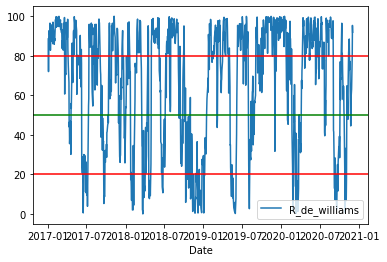

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

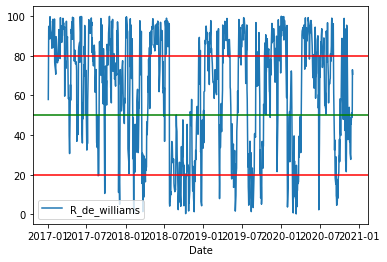

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

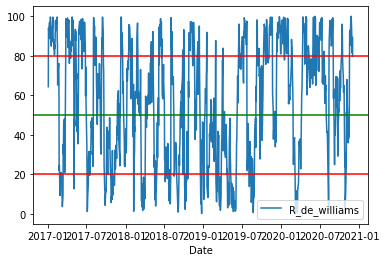

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

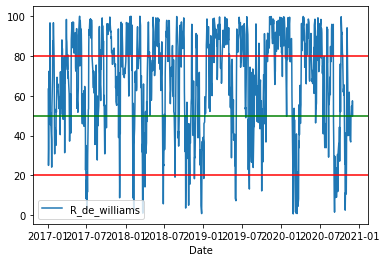

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

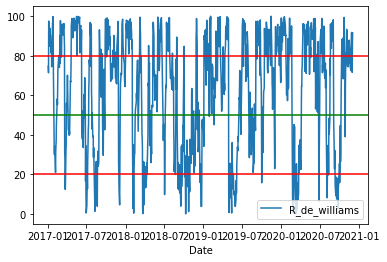

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

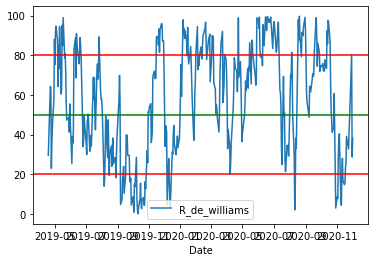

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

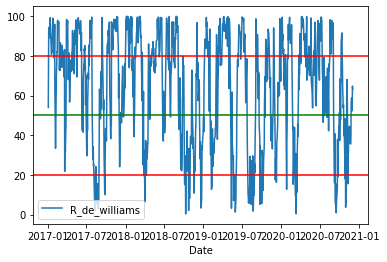

In [24]:
stocks.call_insight_function("plot_r_de_williams")

### Momentum and ROC

These two indicators are very similar in their philosophy. They measure the acceleration or deceleration of a trend. They often mark their peaks and troughs even before prices have reached their extremes.

Momentum and ROC compare the closing price to the price of a past session.

The difference lies in the way they are calculated. Momentum is obtained by subtracting a past price from the last known price, while ROC uses a division of the last price by a past price.

Analysis :

The periods (n) commonly used for calculating momentum and ROC are 12 and 25 days.

The faster these indicators rise, the faster and stronger the price rise. Conversely, the faster the indicators fall, the faster and more strongly the price falls.

#### Momentum

In [25]:
stocks.call_insight_function("print_momentum")

###########################
########## APPLE ##########
###########################

+----------+-------------------+
|      Date|           momentum|
+----------+-------------------+
|2017-01-03|                0.0|
|2017-01-04| -0.032501220703125|
|2017-01-05|0.11499977111816406|
|2017-01-06| 0.4400005340576172|
|2017-01-09| 0.7099990844726562|
|2017-01-10| 0.7399997711181641|
|2017-01-11| 0.8999996185302734|
|2017-01-12| 0.7749996185302734|
|2017-01-13| 0.7224998474121094|
|2017-01-17| 0.8474998474121094|
|2017-01-18| 0.5199985504150391|
|2017-01-19|0.19750022888183594|
|2017-01-20| 0.2525005340576172|
|2017-01-23|0.08250045776367188|
|2017-01-24|0.18000030517578125|
|2017-01-25| 0.7099990844726562|
|2017-01-26| 0.4850006103515625|
|2017-01-27| 0.4874992370605469|
|2017-01-30| 0.4099998474121094|
|2017-01-31| 0.3924999237060547|
+----------+-------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+--

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

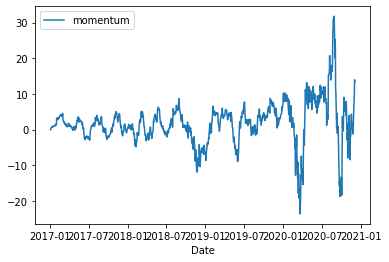

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

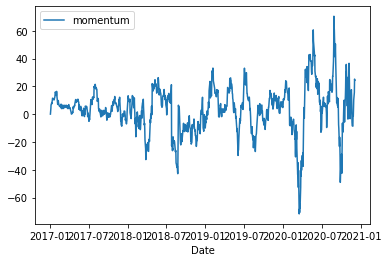

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

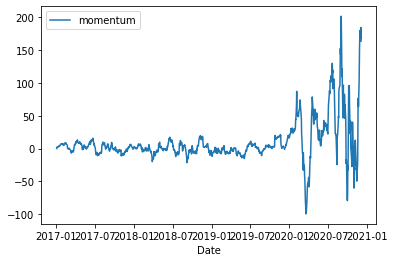

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

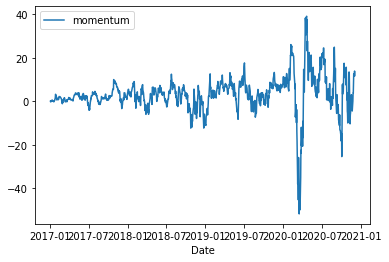

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

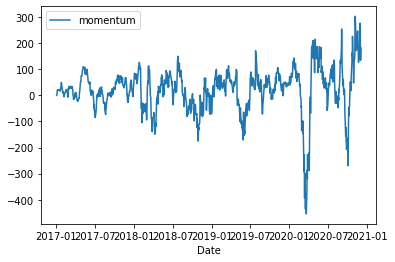

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

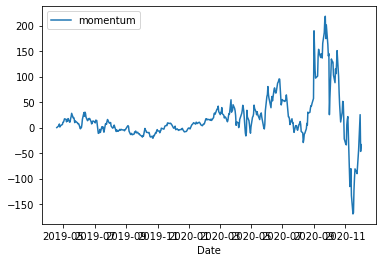

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

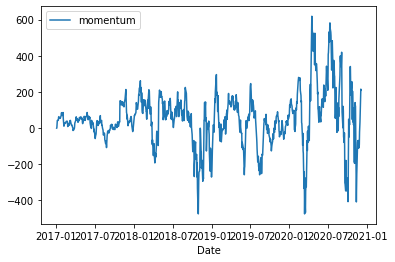

In [26]:
stocks.call_insight_function("plot_momentum")

#### Roc

In [27]:
stocks.call_insight_function("print_roc")

###########################
########## APPLE ##########
###########################

+----------+------------------+
|      Date|               roc|
+----------+------------------+
|2017-01-03|               1.0|
|2017-01-04|0.9988807156168351|
|2017-01-05|1.0039603881052912|
|2017-01-06|1.0151528378227213|
|2017-01-09| 1.024451108915895|
|2017-01-10|1.0254842793421157|
|2017-01-11|1.0309943902438865|
|2017-01-12|1.0266896119965216|
|2017-01-13|1.0248816130149128|
|2017-01-17|1.0331467793675688|
|2017-01-18|1.0330606654106247|
|2017-01-19|1.0312526664290158|
|2017-01-20|1.0331467793675688|
|2017-01-23| 1.033835559651716|
|2017-01-24|1.0328885031824395|
|2017-01-25|1.0493327219308075|
|2017-01-26|1.0498493399867697|
|2017-01-27|1.0499353882580105|
|2017-01-30| 1.043049452163546|
|2017-01-31|1.0291747494289762|
+----------+------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+----------+---------------

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

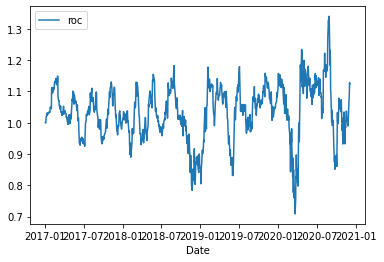

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

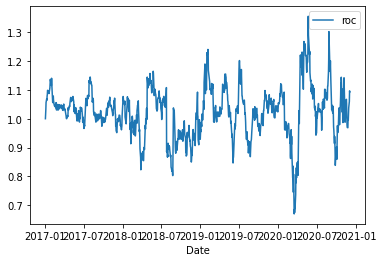

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

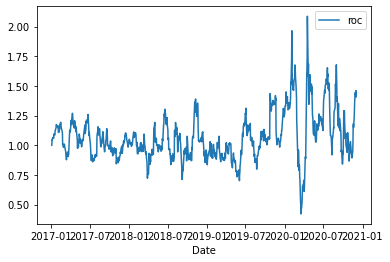

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

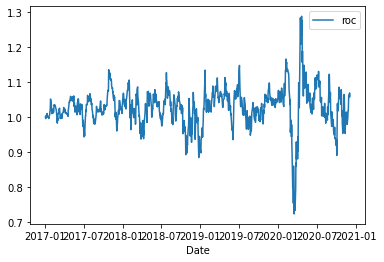

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

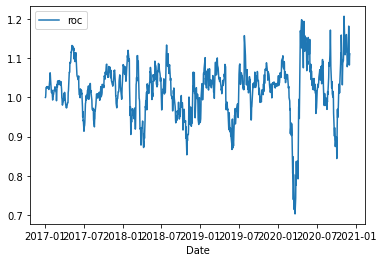

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

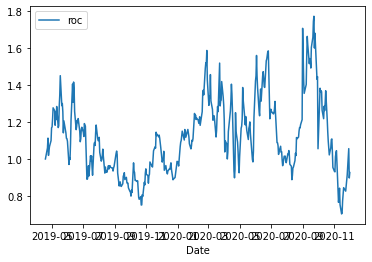

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

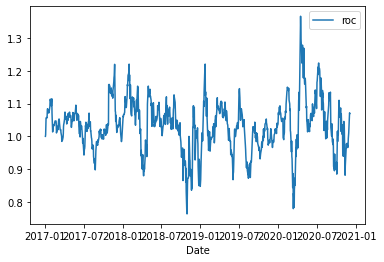

In [28]:
stocks.call_insight_function("plot_roc")

### Commodity Chanel Index

Developed by Donald R. Lambert, it was originally designed to identify turning points in commodity markets, which are cyclical. Its use has spread to all markets and at the same time has moved away from its original principles. Today, the CCI is a speed indicator, mainly used to set overbought/oversold levels and detect divergences. Therefore, it is found in the oscillator family.

The CCI calculates the difference between the price and its x-day average divided by 1.5% of the standard deviation.

Analysis :

When the CCI is above the +100 level, the trend is strongly bullish, which is a buy signal. Conversely, when the CCI is below -100, the trend is strongly bearish, which is a bearish signal.

This approach is interesting because it allows traders to intervene on a stock only during a strong trend.

In [29]:
stocks.call_insight_function("print_cci")

###########################
########## APPLE ##########
###########################

+----------+------------------+
|      Date|               CCI|
+----------+------------------+
|2017-01-03|              null|
|2017-01-04|133.33333333333334|
|2017-01-05|132.17410341847776|
|2017-01-06|180.37316138436918|
|2017-01-09|  180.852747700827|
|2017-01-10|130.95237387501984|
|2017-01-11|124.42113291224346|
|2017-01-12| 77.47421612469795|
|2017-01-13|  80.4352321875747|
|2017-01-17| 87.99233753300759|
|2017-01-18| 84.71617783836723|
|2017-01-19| 45.45988119924601|
|2017-01-20| 41.33129785288547|
|2017-01-23| 36.83574593879377|
|2017-01-24|15.249496509415394|
|2017-01-25| 90.31387578623224|
|2017-01-26|108.05060809141615|
|2017-01-27| 86.41619969611088|
|2017-01-30|40.134896871889865|
|2017-01-31|28.215875869173093|
+----------+------------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########
##############################

+----------+---------------

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

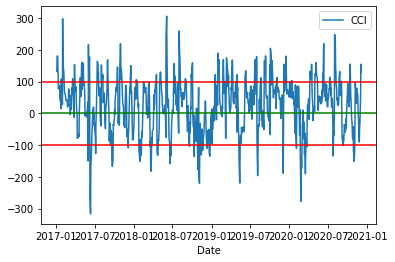

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

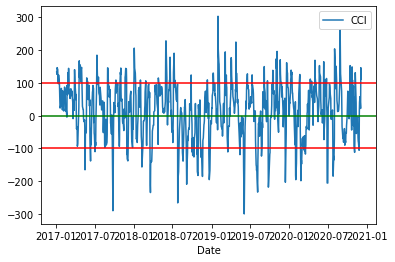

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

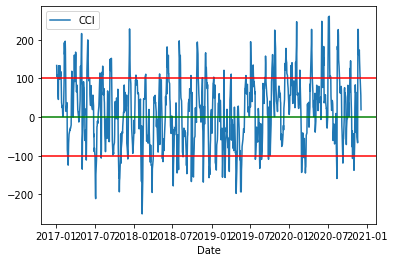

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

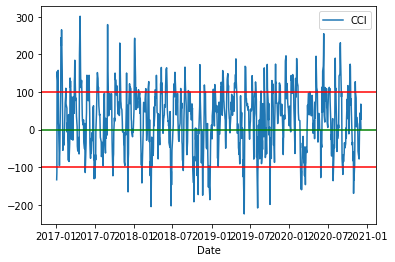

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

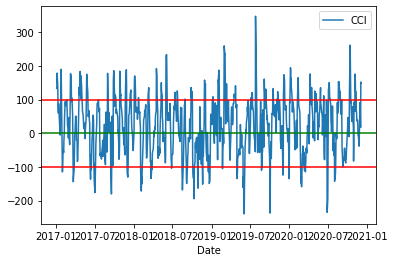

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

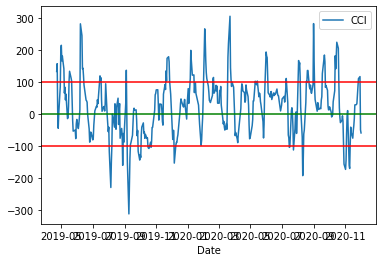

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

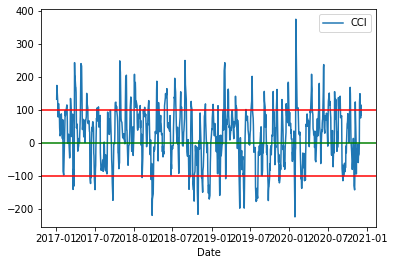

In [30]:
stocks.call_insight_function("plot_cci")

### Bollinger bands

The power of a tendency : If prices get to far away from their average, the bands will greately separate from one another. If the prices stay close the the average, the bands will shrink closer together.The use of standard deviation enables the Bollinger bands to adapt rapidly. The bigger the gap between the two bands, the stronger the tendency.

In [31]:
stocks.call_insight_function("print_bb")

###########################
########## APPLE ##########
###########################

+----------+------------------+------------------+------------------+------------------+
|      Date|             Close|             BB_MM|             BB_UB|             BB_LB|
+----------+------------------+------------------+------------------+------------------+
|2017-01-03|29.037500381469727|29.037500381469727|              null|              null|
|2017-01-04|  29.0049991607666|29.021249771118164|29.067213438230205|28.975286104006123|
|2017-01-05| 29.15250015258789| 29.06499989827474|29.220000584924158| 28.90999921162532|
|2017-01-06|29.477500915527344| 29.16812515258789|29.599603886489067|28.736646418686714|
|2017-01-09|29.747499465942383| 29.28400001525879| 29.92288192871128|  28.6451181018063|
|2017-01-10| 29.77750015258789|29.366250038146973|30.065462216124395| 28.66703786016955|
|2017-01-11|           29.9375| 29.44785717555455|30.218497832011234|28.677216519097865|
|2017-01-12|           29

+----------+-----------------+-----------------+-----------------+-----------------+
|      Date|            Close|            BB_MM|            BB_UB|            BB_LB|
+----------+-----------------+-----------------+-----------------+-----------------+
|2017-01-03|786.1400146484375|786.1400146484375|             null|             null|
|2017-01-04|786.9000244140625|  786.52001953125|787.5948356493328|785.4452034131672|
|2017-01-05|  794.02001953125|  789.02001953125|797.7135582148843|780.3264808476157|
|2017-01-06|806.1500244140625|793.3025207519531|811.8449624425111|774.7600790613951|
|2017-01-09|806.6500244140625| 795.972021484375|815.9818013705662|775.9622415981837|
|2017-01-10|804.7899780273438|797.4416809082031|816.7328862775984|778.1504755388079|
|2017-01-11|807.9099731445312|798.9371512276786|818.2437714698887|779.6305309854685|
|2017-01-12|806.3599853515625|799.8650054931641|818.4941613806775|781.2358496056506|
|2017-01-13|807.8800048828125|800.7555609809028|818.9823537516788

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

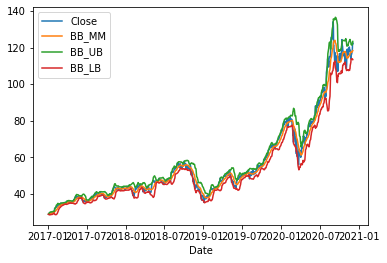

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

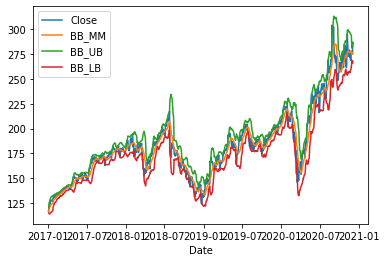

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

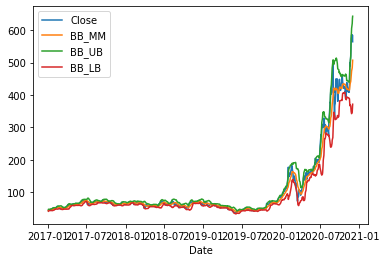

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

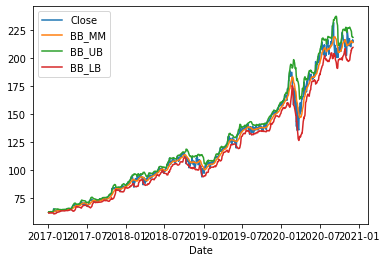

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

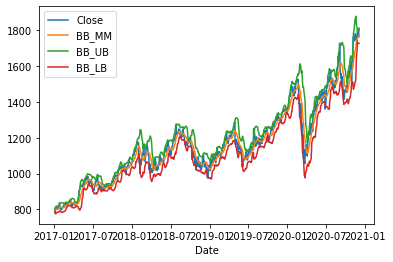

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

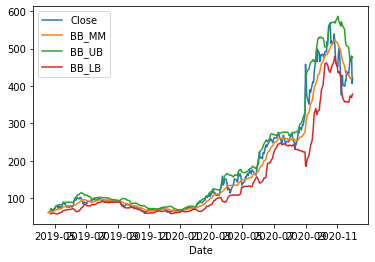

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

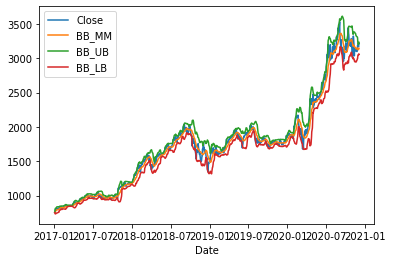

In [32]:
stocks.call_insight_function("plot_bb")

Source insights : https://admiralmarkets.com/fr/formation/articles/indicateurs-forex/bandes-de-bollinger

### Keltner bands

Keltner bands are thus made up of three curves, one curve calculating the moving average of prices over N periods, and two other curves on either side of the moving average, each located at a distance of twice the ATR.

Analysis:

Buy signal: prices make a small bottom outside the lower keltner and then a small top inside this one. This feature signals the potential start of the uptrend.

Sell signal: prices make a small high outside the upper keltner and then a small low inside this time. This characteristic signals the potential start of a decline.

A price movement that originates on the edge of a band always tends to move to the other edge of the opposite band.

Note that if the price does not touch the high/low boundary on a higher or lower high, then the price will move directly to the opposite boundary.

In [33]:
stocks.call_insight_function("print_kb")

###########################
########## APPLE ##########
###########################



22/06/20 13:42:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+------------------+------------------+------------------+
|      Date|             Close|             KB_MM|             KB_UB|             KB_LB|
+----------+------------------+------------------+------------------+------------------+
|2017-01-03|29.037500381469727|29.037500381469727|29.822500228881836|28.252500534057617|
|2017-01-04|  29.0049991607666|29.021249771118164|29.603750228881836|28.438749313354492|
|2017-01-05| 29.15250015258789| 29.06499989827474|29.628334045410156| 28.50166575113932|
|2017-01-06|29.477500915527344| 29.16812515258789|29.801876068115234|28.534374237060547|
|2017-01-09|29.747499465942383| 29.28400001525879|29.943000411987306|28.624999618530275|
|2017-01-10| 29.77750015258789|29.366250038146973| 30.00541655222575|28.727083524068195|
|2017-01-11|           29.9375| 29.44785717555455|30.090714318411692|28.805000032697407|
|2017-01-12|           29.8125| 29.49343752861023| 30.15218758583069| 28.83468747138977|
|2017-01-13|29.760000

22/06/20 13:42:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+------------------+------------------+------------------+
|      Date|             Close|             KB_MM|             KB_UB|             KB_LB|
+----------+------------------+------------------+------------------+------------------+
|2017-01-03|116.86000061035156|116.86000061035156|121.51998901367188|112.20001220703125|
|2017-01-04|118.69000244140625| 117.7750015258789|122.90499877929688|112.64500427246094|
|2017-01-05|120.66999816894531|118.74000040690105|  123.913330078125|113.56667073567709|
|2017-01-06|123.41000366210938|119.90750122070312|125.71249771118164|114.10250473022461|
|2017-01-09| 124.9000015258789|120.90600128173828|126.50599822998048|115.30600433349609|
|2017-01-10| 124.3499984741211|121.48000081380208|126.55333201090494|116.40666961669922|
|2017-01-11|126.08999633789062|122.13857160295758|127.07571411132812|117.20142909458704|
|2017-01-12|126.62000274658203|122.69875049591064|127.50125026702881|117.89625072479248|
|2017-01-13|128.33999

22/06/20 13:42:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+------------------+------------------+------------------+
|      Date|             Close|             KB_MM|             KB_UB|             KB_LB|
+----------+------------------+------------------+------------------+------------------+
|2017-01-03| 43.39799880981445| 43.39799880981445|47.145999908447266| 39.64999771118164|
|2017-01-04| 45.39799880981445| 44.39799880981445|  49.0099983215332|  39.7859992980957|
|2017-01-05|45.349998474121094|    44.71533203125|48.527331034342446|40.903333028157554|
|2017-01-06|45.801998138427734|44.986998558044434|48.331997871398926| 41.64199924468994|
|2017-01-09| 46.25600051879883| 45.24079895019531| 48.23039855957031|42.251199340820314|
|2017-01-10|  45.9739990234375|45.362998962402344| 48.19499969482422| 42.53099822998047|
|2017-01-11| 45.94599914550781| 45.44628470284598|48.062285287039614|42.830284118652344|
|2017-01-12|45.917999267578125|  45.5052490234375|48.050249099731445|42.960248947143555|
|2017-01-13| 47.54999

22/06/20 13:42:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+------------------+------------------+------------------+
|      Date|             Close|             KB_MM|             KB_UB|             KB_LB|
+----------+------------------+------------------+------------------+------------------+
|2017-01-03| 62.58000183105469| 62.58000183105469|              64.0|61.160003662109375|
|2017-01-04| 62.29999923706055| 62.44000053405762| 63.78000068664551| 61.10000038146973|
|2017-01-05| 62.29999923706055|62.393333435058594| 63.70666758219401| 61.07999928792318|
|2017-01-06| 62.84000015258789| 62.50500011444092| 64.04500102996826|60.964999198913574|
|2017-01-09| 62.63999938964844| 62.53199996948242|63.980001068115236|61.083998870849605|
|2017-01-10|62.619998931884766| 62.54666646321615| 64.01666768391928| 61.07666524251302|
|2017-01-11|63.189998626708984|62.638571058000835| 64.12714331490653|61.149998801095144|
|2017-01-12| 62.61000061035156| 62.63499975204468| 64.30000066757202|60.969998836517334|
|2017-01-13| 62.70000

22/06/20 13:42:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+-----------------+-----------------+-----------------+-----------------+
|      Date|            Close|            KB_MM|            KB_UB|            KB_LB|
+----------+-----------------+-----------------+-----------------+-----------------+
|2017-01-03|786.1400146484375|786.1400146484375| 813.800048828125|  758.47998046875|
|2017-01-04|786.9000244140625|  786.52001953125|808.5300903320312|764.5099487304688|
|2017-01-05|  794.02001953125|  789.02001953125|810.0000406901041|768.0399983723959|
|2017-01-06|806.1500244140625|793.3025207519531|816.8855590820312| 769.719482421875|
|2017-01-09|806.6500244140625| 795.972021484375|817.6928466796875|774.2511962890625|
|2017-01-10|804.7899780273438|797.4416809082031|817.4157002766927|777.4676615397135|
|2017-01-11|807.9099731445312|798.9371512276786| 817.994890485491| 779.879411969866|
|2017-01-12|806.3599853515625|799.8650054931641|818.7255249023438|781.0044860839844|
|2017-01-13|807.8800048828125|800.7555609809028|818.6013590494792

22/06/20 13:42:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+-----------------+------------------+-----------------+------------------+
|      Date|            Close|             KB_MM|            KB_UB|             KB_LB|
+----------+-----------------+------------------+-----------------+------------------+
|2019-04-18|             62.0|              62.0|73.35800170898438|50.641998291015625|
|2019-04-22|65.69999694824219|63.849998474121094| 78.4890022277832|49.210994720458984|
|2019-04-23|             69.0| 65.56666564941406| 81.0719985961914| 50.06133270263672|
|2019-04-24|63.20000076293945| 64.97499942779541|80.77399921417236| 49.17599964141846|
|2019-04-25|             65.0| 64.97999954223633|79.31919937133789| 50.64079971313477|
|2019-04-26|66.22000122070312| 65.18666648864746|78.26599947611491|52.107333501180015|
|2019-04-29|68.16999816894531|    65.61285672869|77.89514214651925| 53.33057131086076|
|2019-04-30|72.47000122070312| 66.46999979019165|78.67949914932251| 54.26050043106079|
|2019-05-01|72.76000213623047| 67.168888939

22/06/20 13:42:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:42:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+-----------------+-----------------+-----------------+-----------------+
|      Date|            Close|            KB_MM|            KB_UB|            KB_LB|
+----------+-----------------+-----------------+-----------------+-----------------+
|2017-01-03|753.6699829101562|753.6699829101562|775.7899780273438|731.5499877929688|
|2017-01-04|757.1799926757812|755.4249877929688|772.4949951171875|  738.35498046875|
|2017-01-05|780.4500122070312|763.7666625976562|791.9600219726562|735.5733032226562|
|2017-01-06| 795.989990234375|771.8224945068359|803.4475250244141|740.1974639892578|
|2017-01-09|796.9199829101562|   776.8419921875|806.1420166015624|747.5419677734375|
|2017-01-10|795.9000244140625|780.0183308919271|807.2550252278646|752.7816365559896|
|2017-01-11|  799.02001953125|782.7328578404018|808.9328787667412|756.5328369140625|
|2017-01-12|813.6400146484375|786.5962524414062|813.2987670898438|759.8937377929688|
|2017-01-13|817.1400146484375| 789.990003797743|816.0033501519097

###########################
########## APPLE ##########
###########################



22/06/20 13:44:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

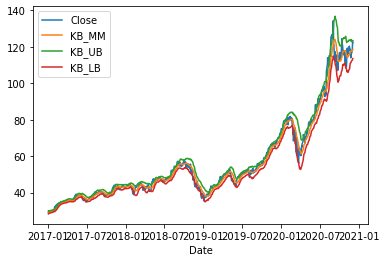

##############################
########## FACEBOOK ##########
##############################



22/06/20 13:44:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

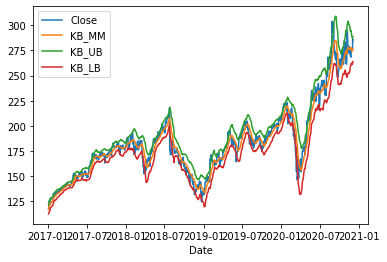

###########################
########## TESLA ##########
###########################



22/06/20 13:44:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

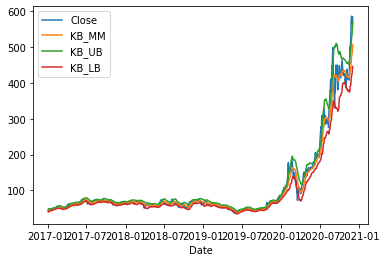

###############################
########## MICROSOFT ##########
###############################



22/06/20 13:44:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

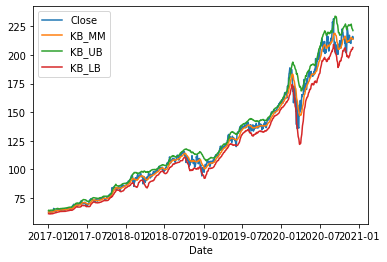

############################
########## GOOGLE ##########
############################



22/06/20 13:44:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

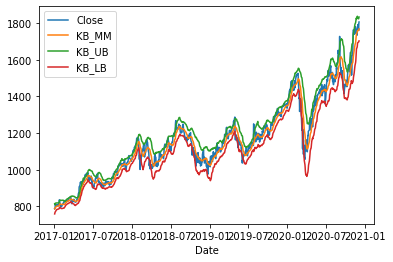

##########################
########## ZOOM ##########
##########################



22/06/20 13:44:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

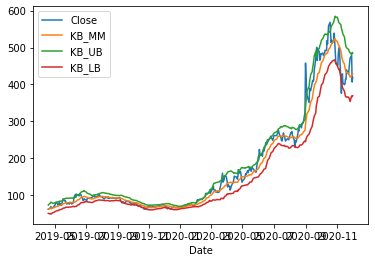

############################
########## AMAZON ##########
############################



22/06/20 13:44:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:44:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

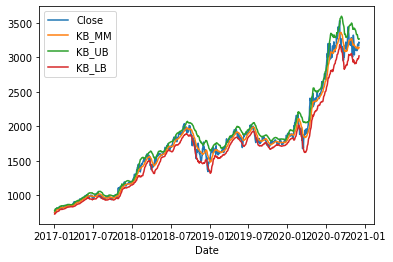

In [39]:
stocks.call_insight_function("plot_kb")

Source insights: https://www.analyse-technique-boursiere.fr/indicateur/keltner

### Detrend Price Oscillator

Description :

The Detrend Price Oscillator is a trend indicator calculated from the difference between the closing price and a moving average. The objective of this indicator is to present the price evolution in a smoothed way and thus to allow the detection of market cycles, eliminating the influence of minor price trends and the inconvenience of volatility.

 

Analysis:

The indicator allows the elimination of market cycles below the indicator's calculation period. Therefore, the analysis of the peaks and troughs of the indicator allows to identify the turning points in the cycles corresponding to the calculation period of the indicator.

The indicator detects the major turning points in the cycle corresponding to its calculation period.

In [35]:
stocks.call_insight_function("print_dpo")

###########################
########## APPLE ##########
###########################

+----------+------------------+--------------------+
|      Date|             Close|                 DPO|
+----------+------------------+--------------------+
|2017-01-03|29.037500381469727|                 0.0|
|2017-01-04|  29.0049991607666|  0.0162506103515625|
|2017-01-05| 29.15250015258789|-0.02749951680501...|
|2017-01-06|29.477500915527344|-0.13062477111816406|
|2017-01-09|29.747499465942383|-0.24649963378906392|
|2017-01-10| 29.77750015258789| -0.3287496566772461|
|2017-01-11|           29.9375|-0.41035679408482295|
|2017-01-12|           29.8125|-0.45593714714050293|
|2017-01-13|29.760000228881836| -0.4855552249484596|
|2017-01-17|              30.0|-0.09324913024902415|
|2017-01-18|29.997499465942383| 0.13795401833274212|
|2017-01-19| 29.94499969482422| 0.10999949773152551|
|2017-01-20|              30.0| 0.08211487990159227|
|2017-01-23|30.020000457763672| 0.12178570883614626|
|2017-01-24| 2

+----------+-----------------+-------------------+
|      Date|            Close|                DPO|
+----------+-----------------+-------------------+
|2017-01-03|753.6699829101562|                0.0|
|2017-01-04|757.1799926757812|   -1.7550048828125|
|2017-01-05|780.4500122070312|     -10.0966796875|
|2017-01-06| 795.989990234375|-18.152511596679688|
|2017-01-09|796.9199829101562|-23.172009277343705|
|2017-01-10|795.9000244140625| -26.34834798177087|
|2017-01-11|  799.02001953125|-29.062874930245584|
|2017-01-12|813.6400146484375|    -32.92626953125|
|2017-01-13|817.1400146484375| -36.32002088758679|
|2017-01-17| 809.719970703125| 4.0269897460937045|
|2017-01-18|  807.47998046875|  3.546347878196002|
|2017-01-19|809.0399780273438| 2.2408192952474337|
|2017-01-20|808.3300170898438| 1.1907536433293444|
|2017-01-23|817.8800048828125|  16.32858712332586|
|2017-01-24|822.4400024414062|  14.91644287109375|
|2017-01-25|  836.52001953125|  1.829254150390625|
|2017-01-26|839.1500244140625| 

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

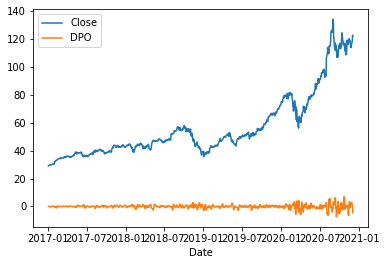

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

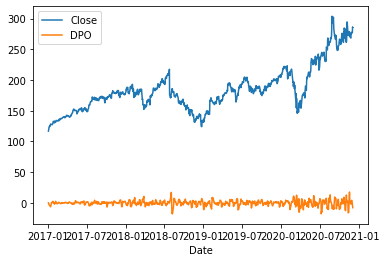

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

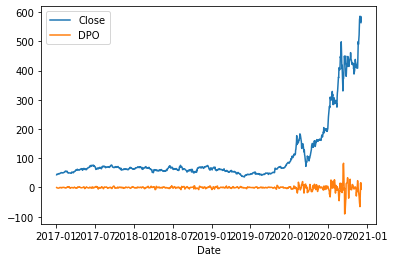

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

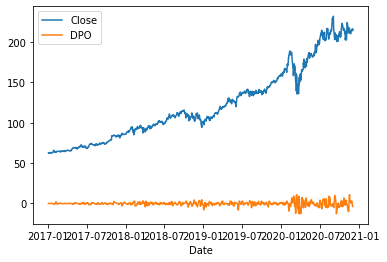

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

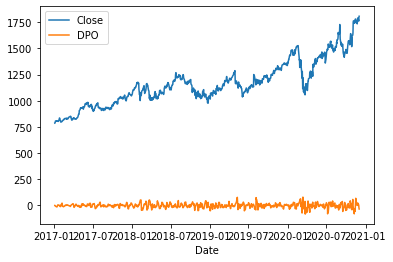

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

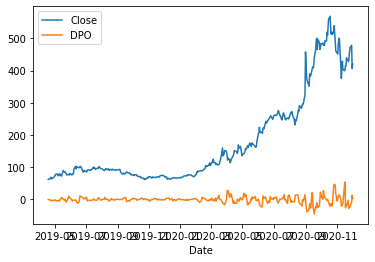

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

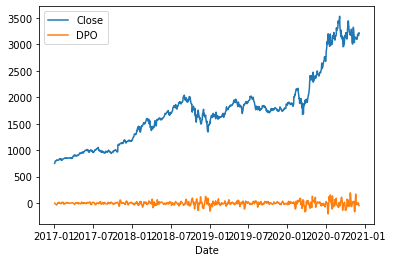

In [36]:
stocks.call_insight_function("plot_dpo")

Source insights: https://www.waldata.fr/indicateurs.asp?name=Detrend-Price-Oscillator&Id=759

### Balance of Power

Description:

The Balance of Power (BOP) indicator measures a price trend by assessing the strength of buy and sell signals, determining the strength with which the price moves to extremely high and low levels.

Analysis:

The BOP oscillates between -1 and 1, with positive values indicating stronger buying pressure and negative values indicating strong selling pressure. When the indicator approaches zero, it indicates that the strength of buyers and sellers is being equalized.

In [37]:
stocks.call_insight_function("print_bof")

###########################
########## APPLE ##########
###########################

+----------+------------------+-------------------+
|      Date|             Close|                BOF|
+----------+------------------+-------------------+
|2017-01-03|29.037500381469727|0.22292900774116423|
|2017-01-04|  29.0049991607666| 0.2233050901276719|
|2017-01-05| 29.15250015258789|0.36791781753404623|
|2017-01-06|29.477500915527344|0.44309860729080697|
|2017-01-09|29.747499465942383|0.49407652430123444|
|2017-01-10| 29.77750015258789|0.46420046665836523|
|2017-01-11|           29.9375| 0.5063716938413556|
|2017-01-12|           29.8125|0.48321252571581697|
|2017-01-13|29.760000228881836|0.41992015365625723|
|2017-01-17|              30.0|0.46010667397321797|
|2017-01-18|29.997499465942383| 0.4365476814726391|
|2017-01-19| 29.94499969482422|0.46695743030296244|
|2017-01-20|              30.0|0.33874297061233777|
|2017-01-23|30.020000457763672|0.27957134993968624|
|2017-01-24| 29.99250030517578|

+----------+-----------------+--------------------+
|      Date|            Close|                 BOF|
+----------+-----------------+--------------------+
|2017-01-03|753.6699829101562| -0.3842677159270889|
|2017-01-04|757.1799926757812| -0.3025377161119896|
|2017-01-05|780.4500122070312| 0.08286121408991269|
|2017-01-06| 795.989990234375|   0.224717363266694|
|2017-01-09|796.9199829101562| 0.15817354881648021|
|2017-01-10|795.9000244140625| 0.11802190230494596|
|2017-01-11|  799.02001953125|  0.1778104454532002|
|2017-01-12|813.6400146484375| 0.26947693403766837|
|2017-01-13|817.1400146484375| 0.27010423756430957|
|2017-01-17| 809.719970703125| 0.19548200913985453|
|2017-01-18|  807.47998046875| 0.20683062914204106|
|2017-01-19|809.0399780273438|  0.2134021666196649|
|2017-01-20|808.3300170898438| 0.05682718895491934|
|2017-01-23|817.8800048828125| 0.07436217866380715|
|2017-01-24|822.4400024414062| 0.08979883949046878|
|2017-01-25|  836.52001953125| 0.18653114675016053|
|2017-01-26|

###########################
########## APPLE ##########
###########################



<Figure size 2160x720 with 0 Axes>

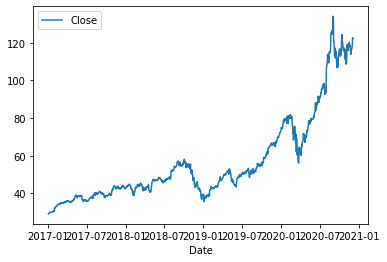

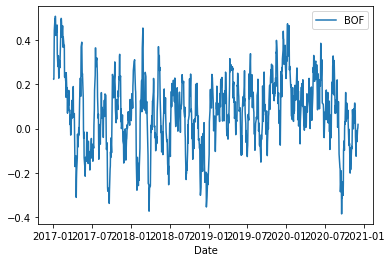

##############################
########## FACEBOOK ##########
##############################



<Figure size 2160x720 with 0 Axes>

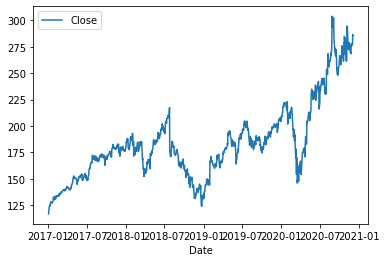

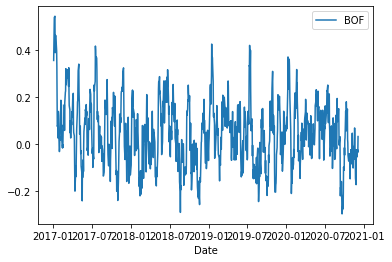

###########################
########## TESLA ##########
###########################



<Figure size 2160x720 with 0 Axes>

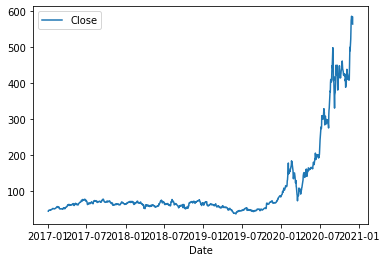

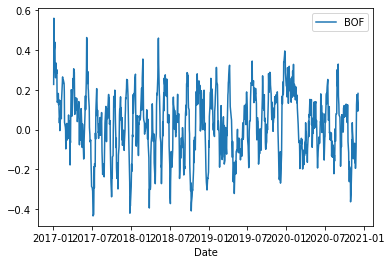

###############################
########## MICROSOFT ##########
###############################



<Figure size 2160x720 with 0 Axes>

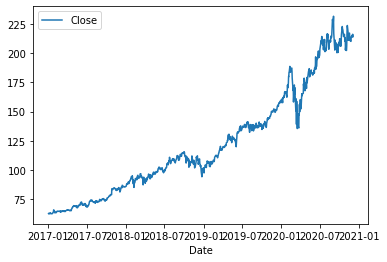

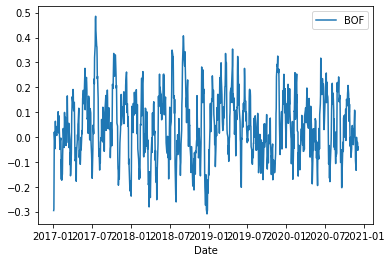

############################
########## GOOGLE ##########
############################



<Figure size 2160x720 with 0 Axes>

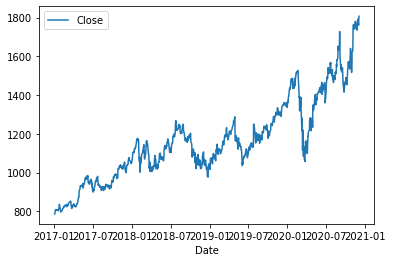

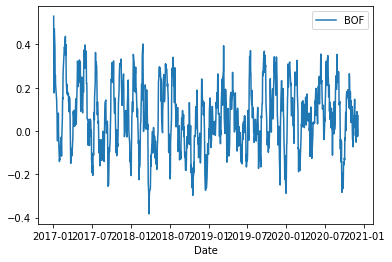

##########################
########## ZOOM ##########
##########################



<Figure size 2160x720 with 0 Axes>

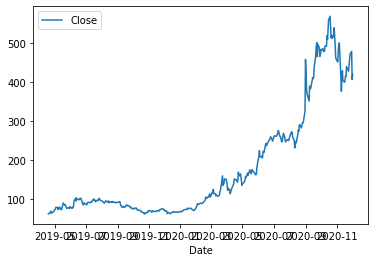

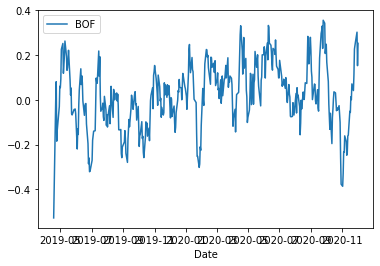

############################
########## AMAZON ##########
############################



<Figure size 2160x720 with 0 Axes>

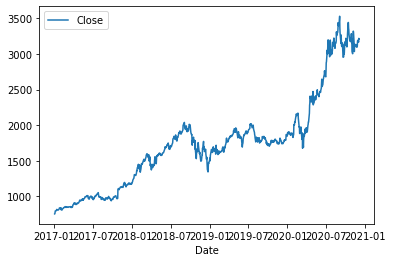

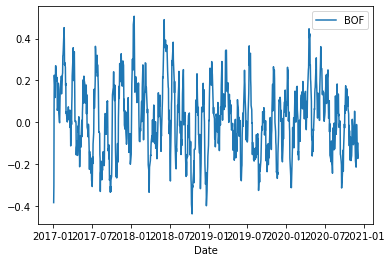

In [38]:
stocks.call_insight_function("plot_bof")

Source insights: https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power